# Стратегия

Стратегия — это поведенческий паттерн проектирования, который определяет семейство схожих
алгоритмов и помещает каждый из них в собственный класс, после чего алгоритмы можно
взаимозаменять прямо во время исполнения программы.

Паттерн Стратегия предлагает определить семейство схожих алгоритмов, которые часто
изменяются или расширяются, и вынести их в собственные классы, называемые стратегиями.
Вместо того, чтобы изначальный класс сам выполнял тот или иной алгоритм, он будет играть роль
контекста, ссылаясь на одну из стратегий и делегируя ей выполнение работы. Чтобы сменить
алгоритм, вам будет достаточно подставить в контекст другой объект-стратегию.

Важно, чтобы все стратегии имели общий интерфейс. Используя этот интерфейс, контекст будет
независимым от конкретных классов стратегий. С другой стороны, вы сможете изменять и
добавлять новые виды алгоритмов, не трогая код контекста.

Примером исплоьзования паттерна стратегия может быть обработка оплаты:

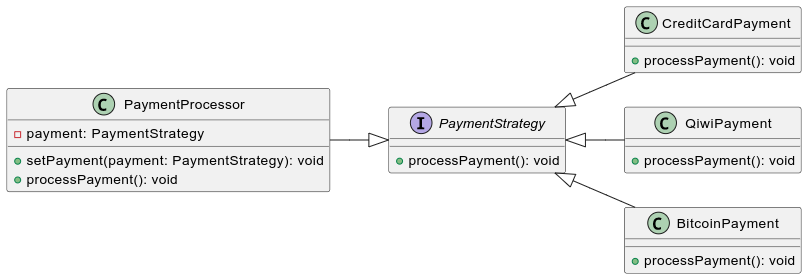


Изначальный класс PaymentProcessor имеет интерфейс PaymentStrategy, служащий контекстом, и независимые контексты для оплаты по кредитной карте, Qiwi и Bitcoin.Можно добавлять больше шлюзов.

## Реализация на языке программирования Python
Реализуем изначальный класс PaymentProcessor и интерфейс PaymentStrategy:

In [4]:
from abc import ABC, abstractmethod

class PaymentProcessor:
    def __init__(self, payment_strategy):
        self.payment_strategy = payment_strategy
    def process_payment(self, amount):
        self.payment_strategy.process_payment(amount)
        
class PaymentStrategy(ABC):
    @abstractmethod
    def process_payment(self, amount):
        pass

Добавим стратегии оплаты по разным платёжным шлюзам (кредитная карта, Qiwi, Bitcoin):

In [5]:
class CreditCardStrategy(PaymentStrategy):
    def process_payment(self, amount):
        print(f"Обрабатывается оплата по кредитной карте: {amount} р.")

class QiwiStrategy(PaymentStrategy):
    def process_payment(self, amount):
        print(f"Обрабатывается оплата по Qiwi: {amount} р")

class BitcoinStrategy(PaymentStrategy):
    def process_payment(self, amount):
        print(f"Обрабатывается оплата по Bitcoin: {amount} р")

Реализуем примеры:

In [6]:
credit_card_strategy = CreditCardStrategy()
payment_processor = PaymentProcessor(credit_card_strategy)
payment_processor.process_payment(100)

paypal_strategy = QiwiStrategy()
payment_processor = PaymentProcessor(paypal_strategy)
payment_processor.process_payment(50)

bitcoin_strategy = BitcoinStrategy()
payment_processor = PaymentProcessor(bitcoin_strategy)
payment_processor.process_payment(200)

Обрабатывается оплата по кредитной карте: 100 р.
Обрабатывается оплата по Qiwi: 50 р
Обрабатывается оплата по Bitcoin: 200 р
